In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from lib.utils import get_bout_statistics_for_predictions

/home/andrew/.local/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [14]:
holdout_idx = [5,21,22,23,25]
fileindex = 22
stats = pd.DataFrame()
for fileindex in range(32):
    if fileindex in holdout_idx:
        continue
    stats_a = get_bout_statistics_for_predictions(pd.read_csv(f'../data/alpha_sleep/{fileindex}.csv')['label'])
    stats_a = stats_a.reset_index().melt(id_vars='index')
    stats_a['fileindex'] = fileindex
    stats = pd.concat([stats,stats_a])

<AxesSubplot:xlabel='value', ylabel='Density'>

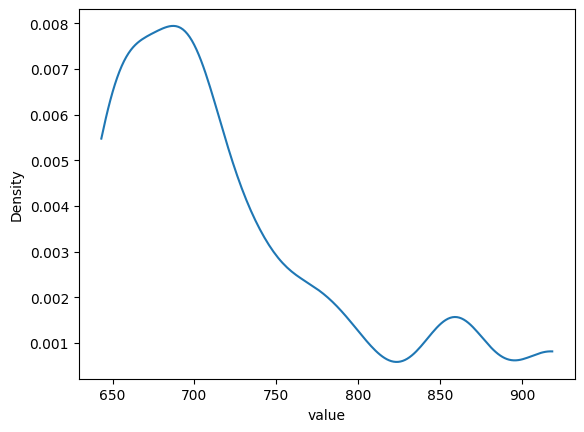

In [25]:
import seaborn as sns
sns.kdeplot(data=stats[(stats['index'] == 'total') & (stats['variable'] == 'W')].reset_index(),x='value',cut=0,bw_adjust=.5)

In [13]:
stats_a

,index,variable,value,fileindex
0,total,P,100.666667,22
1,average,P,88.823529,22
2,counts,P,68.000000,22
3,total,S,649.500000,22
4,average,S,182.102804,22
5,counts,S,214.000000,22
6,total,W,689.333333,22
7,average,W,197.894737,22
8,counts,W,209.000000,22


In [ ]:
percent_error = (abs(stats_a-stats_b)/stats_a)*100
percent_error

In [ ]:
b = pd.concat([pd.Series(['X','X']), b]).reset_index(drop=True)
import plotly.express as px
fig = px.line(pd.DataFrame([a,b],index=['Expert','Neural Network']).T)
fig.show(renderer='browser')

In [143]:
pred = pd.read_excel('Reviewed Scoring 22-AGING-8.xls').drop(0).reset_index(drop=True)['Rodent Sleep']
get_bout_statistics_for_predictions(pred)

WARNING *** file size (477547) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


,P,S,W
total,71.166667,581.833333,787.00000
average,79.074074,129.776952,176.19403
counts,54.000000,269.000000,268.00000
